In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
%matplotlib inline
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split # sci-kit learn library to split tr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # importing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # train_test_split is needed to spl
from sklearn.preprocessing import MinMaxScaler # for normalisation or standardisation o
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import (accuracy_score, classification_report, 
 confusion_matrix, ConfusionMatrixDisplay,
RocCurveDisplay,roc_auc_score)
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
le = LabelEncoder()
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score
from sklearn.model_selection import learning_curve

In [2]:
#loading dataset
vgs = pd.read_csv('Video_Games.csv')
vgs

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#finding null values
vgs.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [4]:
#checking columns
vgs.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
#checking data types
vgs.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
# converting usercore to float then interpolating for missing numeric values
vgs['User_Score'] = pd.to_numeric(vgs['User_Score'], errors='coerce')

columns_to_fill = ['Critic_Score', 'Critic_Count', 'User_Score','User_Count', 'Year_of_Release'] 
for col in columns_to_fill:
    vgs[col] = vgs[col].interpolate(method='linear')


In [7]:
# filling genre and publisher with the mode since the missing values are very few
genre_mode = vgs['Genre'].mode()[0]
vgs['Genre'].fillna(genre_mode, inplace=True)
publisher_mode = vgs['Publisher'].mode()[0]
vgs['Publisher'].fillna(publisher_mode, inplace=True)
vgs['Name'].fillna('Not Available', inplace=True)

In [8]:
vgs.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6623
Rating             6769
dtype: int64

## It would be unreasonable to interpolate or fill Developer and Rating Nan values because of the volume as this would create bias, so they would be dropped, but only when doing analysis concerning those columns. They would be included in the other analysis of columns where their specific values arent important but others in the rows are important

In [9]:
vgs

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,79.0,62.000000,8.150000,515.500000,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,83.0,70.333333,8.166667,271.666667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,63.0,6.000000,5.800000,8.000000,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,63.0,6.000000,5.800000,8.000000,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,63.0,6.000000,5.800000,8.000000,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,63.0,6.000000,5.800000,8.000000,NaN,NaN


# Finding what variables best predicts global sales

### Extracting all the sales columns to see which regions have the most sales and influence global figures the most

In [10]:
vgs_sales = vgs[['Global_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'NA_Sales']].copy()
vgs_sales

,Global_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Sales
0,82.53,28.96,3.77,8.45,41.36
1,40.24,3.58,6.81,0.77,29.08
2,35.52,12.76,3.79,3.29,15.68
3,32.77,10.93,3.28,2.95,15.61
4,31.37,8.89,10.22,1.00,11.27
...,...,...,...,...,...
16714,0.01,0.00,0.01,0.00,0.00
16715,0.01,0.01,0.00,0.00,0.00
16716,0.01,0.00,0.01,0.00,0.00
16717,0.01,0.00,0.00,0.00,0.01


<Axes: >

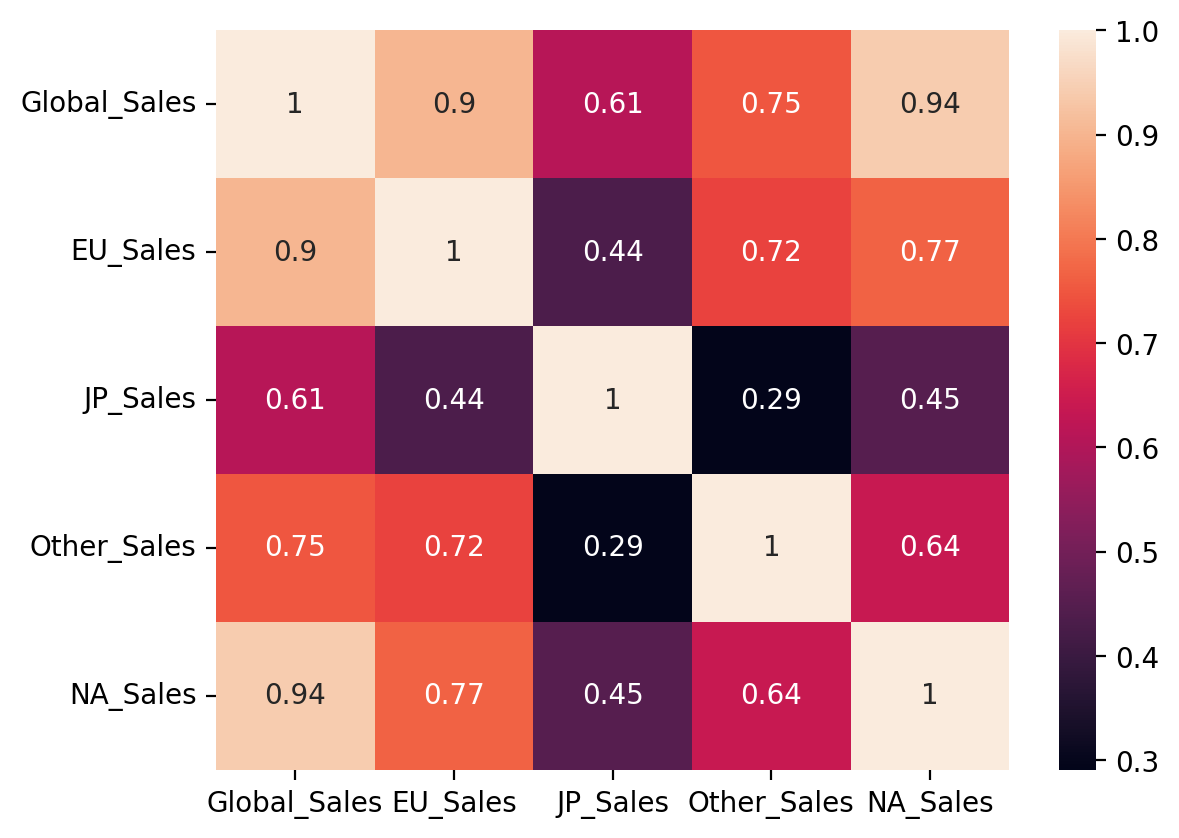

In [11]:
# plotting a heatmap to see the relationship between global sales and rgional sales
plt.figure(dpi=200)
sns.heatmap(vgs_sales.corr(), annot = True)

In [12]:
# Splitting the sales data into input and output variables
X = vgs_sales.drop(['Global_Sales'], axis=1)
y = vgs_sales['Global_Sales']

In [13]:
# Splitting the sale data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#scaling the sales dataset to mitigate figures disparity
scale = StandardScaler()
scale.fit(X_train) 
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [15]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# North America sales against Global Sales

In [16]:
# extracting the NA sales column to be reshaped
X_train_scaled['NA_Sales'].shape 

(13375,)

In [17]:
# Reshaping the NA Sales
X_train_scaled_nas = X_train_scaled['NA_Sales'].to_numpy().reshape(-1,1) 
X_test_scaled_nas = X_test_scaled['NA_Sales'].to_numpy().reshape(-1,1)

In [18]:
# Applying other regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled_nas, y_train)
y_pred_lr = lr.predict(X_test_scaled_nas)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_nas, y_train)
y_pred_rf = rf.predict(X_test_scaled_nas)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled_nas, y_train)
y_pred_gb = gb.predict(X_test_scaled_nas)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_nas, y_train)
y_pred_lasso = lasso.predict(X_test_scaled_nas)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled_nas, y_train)
y_pred_svr = svr.predict(X_test_scaled_nas)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled_nas, y_train)
y_pred_kn = kn.predict(X_test_scaled_nas)

In [19]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the NA Sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the NA Sales

Linear Regression - Mean Squared Error: 0.2875, Root Mean Squared Error: 0.5362, Mean Absolute Error: 0.2025, R-squared Score: 0.9304
Random Forest Regression - Mean Squared Error: 0.9405, Root Mean Squared Error: 0.9698, Mean Absolute Error: 0.2120, R-squared Score: 0.7722
Gradient Boosting Regression - Mean Squared Error: 0.8134, Root Mean Squared Error: 0.9019, Mean Absolute Error: 0.2053, R-squared Score: 0.8030
Lasso Regression - Mean Squared Error: 0.3660, Root Mean Squared Error: 0.6050, Mean Absolute Error: 0.2156, R-squared Score: 0.9113
Support Vector Regression - Mean Squared Error: 0.3621, Root Mean Squared Error: 0.6018, Mean Absolute Error: 0.1955, R-squared Score: 0.9123
K Neighbors Regression - Mean Squared Error: 0.9984, Root Mean Squared Error: 0.9992, Mean Absolute Error: 0.2521, R-squared Score: 0.7581


# FOR EUROPE SALES

In [20]:
X_train_scaled['EU_Sales'].shape

(13375,)

In [21]:
X_train_scaled_eus = X_train_scaled['EU_Sales'].to_numpy().reshape(-1,1) 
X_test_scaled_eus = X_test_scaled['EU_Sales'].to_numpy().reshape(-1,1)

In [22]:
# Applying other regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled_eus, y_train)
y_pred_lr = lr.predict(X_test_scaled_eus)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_eus, y_train)
y_pred_rf = rf.predict(X_test_scaled_eus)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled_eus, y_train)
y_pred_gb = gb.predict(X_test_scaled_eus)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_eus, y_train)
y_pred_lasso = lasso.predict(X_test_scaled_eus)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled_eus, y_train)
y_pred_svr = svr.predict(X_test_scaled_eus)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled_eus, y_train)
y_pred_kn = kn.predict(X_test_scaled_eus)

In [23]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the EU Sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the EU Sales

Linear Regression - Mean Squared Error: 0.2995, Root Mean Squared Error: 0.5472, Mean Absolute Error: 0.2402, R-squared Score: 0.9275
Random Forest Regression - Mean Squared Error: 1.2049, Root Mean Squared Error: 1.0977, Mean Absolute Error: 0.2696, R-squared Score: 0.7081
Gradient Boosting Regression - Mean Squared Error: 1.0569, Root Mean Squared Error: 1.0281, Mean Absolute Error: 0.2631, R-squared Score: 0.7440
Lasso Regression - Mean Squared Error: 0.3377, Root Mean Squared Error: 0.5811, Mean Absolute Error: 0.2502, R-squared Score: 0.9182
Support Vector Regression - Mean Squared Error: 0.3497, Root Mean Squared Error: 0.5913, Mean Absolute Error: 0.2274, R-squared Score: 0.9153
K Neighbors Regression - Mean Squared Error: 1.4126, Root Mean Squared Error: 1.1885, Mean Absolute Error: 0.2864, R-squared Score: 0.6578


## For Japan Sales

In [24]:
X_train_scaled['JP_Sales'].shape

(13375,)

In [25]:
X_train_scaled_jps = X_train_scaled['JP_Sales'].to_numpy().reshape(-1,1) 
X_test_scaled_jps = X_test_scaled['JP_Sales'].to_numpy().reshape(-1,1)

In [26]:
# Applying other regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled_jps, y_train)
y_pred_lr = lr.predict(X_test_scaled_jps)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_jps, y_train)
y_pred_rf = rf.predict(X_test_scaled_jps)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled_jps, y_train)
y_pred_gb = gb.predict(X_test_scaled_jps)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_jps, y_train)
y_pred_lasso = lasso.predict(X_test_scaled_jps)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled_jps, y_train)
y_pred_svr = svr.predict(X_test_scaled_jps)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled_jps, y_train)
y_pred_kn = kn.predict(X_test_scaled_jps)

In [27]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the JP Sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the JP Sales

Linear Regression - Mean Squared Error: 2.8220, Root Mean Squared Error: 1.6799, Mean Absolute Error: 0.5214, R-squared Score: 0.3164
Random Forest Regression - Mean Squared Error: 2.5535, Root Mean Squared Error: 1.5980, Mean Absolute Error: 0.5271, R-squared Score: 0.3814
Gradient Boosting Regression - Mean Squared Error: 2.4140, Root Mean Squared Error: 1.5537, Mean Absolute Error: 0.5191, R-squared Score: 0.4152
Lasso Regression - Mean Squared Error: 2.8882, Root Mean Squared Error: 1.6995, Mean Absolute Error: 0.5218, R-squared Score: 0.3003
Support Vector Regression - Mean Squared Error: 3.4286, Root Mean Squared Error: 1.8516, Mean Absolute Error: 0.4443, R-squared Score: 0.1694
K Neighbors Regression - Mean Squared Error: 2.7102, Root Mean Squared Error: 1.6463, Mean Absolute Error: 0.5004, R-squared Score: 0.3435


## For other region sales

In [28]:
X_train_scaled['Other_Sales'].shape

(13375,)

In [29]:
X_train_scaled_oth = X_train_scaled['Other_Sales'].to_numpy().reshape(-1,1) 
X_test_scaled_oth = X_test_scaled['Other_Sales'].to_numpy().reshape(-1,1)

In [30]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled_oth, y_train)
y_pred_lr = lr.predict(X_test_scaled_oth)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_oth, y_train)
y_pred_rf = rf.predict(X_test_scaled_oth)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled_oth, y_train)
y_pred_gb = gb.predict(X_test_scaled_oth)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_oth, y_train)
y_pred_lasso = lasso.predict(X_test_scaled_oth)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled_oth, y_train)
y_pred_svr = svr.predict(X_test_scaled_oth)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled_oth, y_train)
y_pred_kn = kn.predict(X_test_scaled_oth)

In [31]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the Other Sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the Other Sales

Linear Regression - Mean Squared Error: 1.1701, Root Mean Squared Error: 1.0817, Mean Absolute Error: 0.3463, R-squared Score: 0.7165
Random Forest Regression - Mean Squared Error: 2.1785, Root Mean Squared Error: 1.4760, Mean Absolute Error: 0.2980, R-squared Score: 0.4723
Gradient Boosting Regression - Mean Squared Error: 2.2822, Root Mean Squared Error: 1.5107, Mean Absolute Error: 0.2959, R-squared Score: 0.4471
Lasso Regression - Mean Squared Error: 1.3694, Root Mean Squared Error: 1.1702, Mean Absolute Error: 0.3698, R-squared Score: 0.6683
Support Vector Regression - Mean Squared Error: 0.7221, Root Mean Squared Error: 0.8498, Mean Absolute Error: 0.2578, R-squared Score: 0.8251
K Neighbors Regression - Mean Squared Error: 2.3175, Root Mean Squared Error: 1.5223, Mean Absolute Error: 0.3183, R-squared Score: 0.4386


## Multiple linear regression for all sales

In [32]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled, y_train)
y_pred_kn = kn.predict(X_test_scaled)

In [33]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for all regional Sales combined\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for all regional Sales combined

Linear Regression - Mean Squared Error: 0.0000, Root Mean Squared Error: 0.0053, Mean Absolute Error: 0.0030, R-squared Score: 1.0000
Random Forest Regression - Mean Squared Error: 0.6990, Root Mean Squared Error: 0.8361, Mean Absolute Error: 0.0397, R-squared Score: 0.8307
Gradient Boosting Regression - Mean Squared Error: 0.5854, Root Mean Squared Error: 0.7651, Mean Absolute Error: 0.0453, R-squared Score: 0.8582
Lasso Regression - Mean Squared Error: 0.0274, Root Mean Squared Error: 0.1655, Mean Absolute Error: 0.0542, R-squared Score: 0.9934
Support Vector Regression - Mean Squared Error: 0.0056, Root Mean Squared Error: 0.0748, Mean Absolute Error: 0.0743, R-squared Score: 0.9986
K Neighbors Regression - Mean Squared Error: 0.9083, Root Mean Squared Error: 0.9531, Mean Absolute Error: 0.0397, R-squared Score: 0.7800


In [34]:
# Checking for overfitting
train_accuracy = lr.score(X_train_scaled, y_train)
test_accuracy = lr.score(X_test_scaled, y_test)
print("Training accuracy: {:.2f}".format(train_accuracy))
print("Testing accuracy: {:.2f}".format(test_accuracy))

Training accuracy: 1.00
Testing accuracy: 1.00


## For user and critics

In [35]:
# extracting the needed columns for this analysis
vgs1 = vgs[["Global_Sales", "User_Count", "Critic_Score", "Critic_Count", "User_Score"]].copy()

<Axes: >

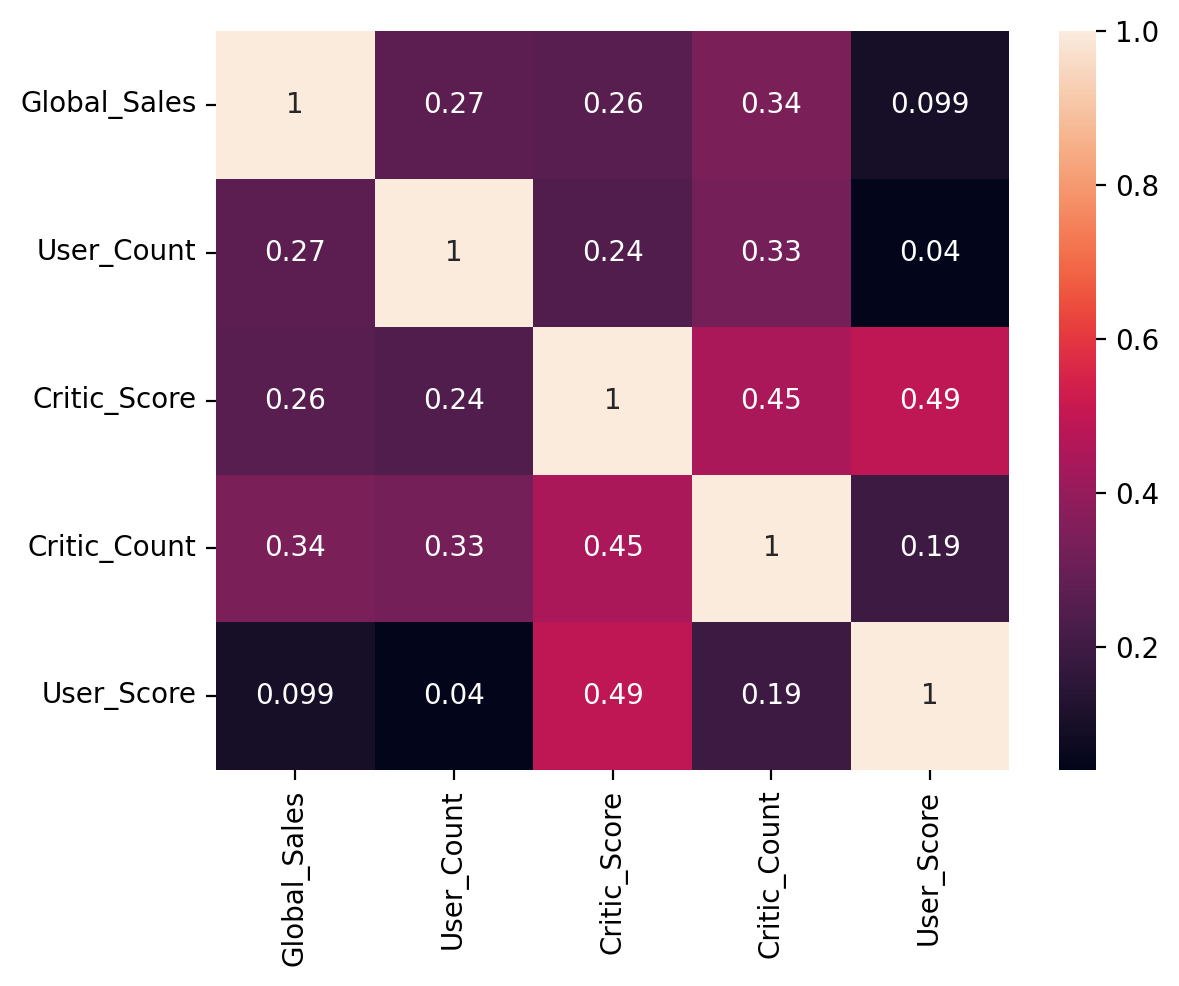

In [36]:
# check the correlation between these values and the global sales
plt.figure(dpi=200)
sns.heatmap(vgs1.corr(), annot = True)

In [37]:
# Split data into input and output variables
X = vgs1.drop(['Global_Sales'], axis=1)
y = vgs1['Global_Sales']

In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#scaling the dataset
scale.fit(X_train) 
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [40]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

## User Score

In [41]:
# needs to be reshaped
X_train_scaled['User_Score'].shape # sklearn accepts data in rows and columns

(13375,)

In [42]:
# Reshaping the attribute
X_train_scaled_usc = X_train_scaled['User_Score'].to_numpy().reshape(-1,1) 
X_test_scaled_usc = X_test_scaled['User_Score'].to_numpy().reshape(-1,1)

In [43]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled_usc, y_train)
y_pred_lr = lr.predict(X_test_scaled_usc)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_usc, y_train)
y_pred_rf = rf.predict(X_test_scaled_usc)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled_usc, y_train)
y_pred_gb = gb.predict(X_test_scaled_usc)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_usc, y_train)
y_pred_lasso = lasso.predict(X_test_scaled_usc)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled_usc, y_train)
y_pred_svr = svr.predict(X_test_scaled_usc)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled_usc, y_train)
y_pred_kn = kn.predict(X_test_scaled_usc)

In [44]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the User Score against Global Sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the User Score against Global Sales

Linear Regression - Mean Squared Error: 4.1006, Root Mean Squared Error: 2.0250, Mean Absolute Error: 0.6020, R-squared Score: 0.0066
Random Forest Regression - Mean Squared Error: 4.0942, Root Mean Squared Error: 2.0234, Mean Absolute Error: 0.5865, R-squared Score: 0.0082
Gradient Boosting Regression - Mean Squared Error: 4.0775, Root Mean Squared Error: 2.0193, Mean Absolute Error: 0.5891, R-squared Score: 0.0122
Lasso Regression - Mean Squared Error: 4.1151, Root Mean Squared Error: 2.0286, Mean Absolute Error: 0.6047, R-squared Score: 0.0031
Support Vector Regression - Mean Squared Error: 4.2513, Root Mean Squared Error: 2.0619, Mean Absolute Error: 0.4903, R-squared Score: -0.0299
K Neighbors Regression - Mean Squared Error: 4.4200, Root Mean Squared Error: 2.1024, Mean Absolute Error: 0.6459, R-squared Score: -0.0707


## Critic Score

In [45]:
# needs to be reshaped
X_train_scaled['Critic_Score'].shape # sklearn accepts data in rows and columns

(13375,)

In [46]:
# Reshaping the attribute
X_train_scaled_csc = X_train_scaled['Critic_Score'].to_numpy().reshape(-1,1) 
X_test_scaled_csc = X_test_scaled['Critic_Score'].to_numpy().reshape(-1,1)

In [47]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled_csc, y_train)
y_pred_lr = lr.predict(X_test_scaled_csc)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_csc, y_train)
y_pred_rf = rf.predict(X_test_scaled_csc)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled_csc, y_train)
y_pred_gb = gb.predict(X_test_scaled_csc)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_csc, y_train)
y_pred_lasso = lasso.predict(X_test_scaled_csc)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled_csc, y_train)
y_pred_svr = svr.predict(X_test_scaled_csc)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled_csc, y_train)
y_pred_kn = kn.predict(X_test_scaled_csc)

In [48]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the Critic Score\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the Critic Score

Linear Regression - Mean Squared Error: 3.9570, Root Mean Squared Error: 1.9892, Mean Absolute Error: 0.6000, R-squared Score: 0.0414
Random Forest Regression - Mean Squared Error: 3.8977, Root Mean Squared Error: 1.9743, Mean Absolute Error: 0.5136, R-squared Score: 0.0558
Gradient Boosting Regression - Mean Squared Error: 3.8728, Root Mean Squared Error: 1.9679, Mean Absolute Error: 0.5120, R-squared Score: 0.0618
Lasso Regression - Mean Squared Error: 3.9709, Root Mean Squared Error: 1.9927, Mean Absolute Error: 0.5769, R-squared Score: 0.0381
Support Vector Regression - Mean Squared Error: 4.1666, Root Mean Squared Error: 2.0412, Mean Absolute Error: 0.4780, R-squared Score: -0.0094
K Neighbors Regression - Mean Squared Error: 4.0604, Root Mean Squared Error: 2.0150, Mean Absolute Error: 0.5789, R-squared Score: 0.0164


## For User Count

In [49]:
# needs to be reshaped
X_train_scaled['User_Count'].shape # sklearn accepts data in rows and columns

(13375,)

In [50]:
# Reshaping the attribute
X_train_scaled_uc = X_train_scaled['User_Count'].to_numpy().reshape(-1,1) 
X_test_scaled_uc = X_test_scaled['User_Count'].to_numpy().reshape(-1,1)

In [51]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled_uc, y_train)
y_pred_lr = lr.predict(X_test_scaled_uc)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_uc, y_train)
y_pred_rf = rf.predict(X_test_scaled_uc)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled_uc, y_train)
y_pred_gb = gb.predict(X_test_scaled_uc)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_uc, y_train)
y_pred_lasso = lasso.predict(X_test_scaled_uc)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled_uc, y_train)
y_pred_svr = svr.predict(X_test_scaled_uc)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled_uc, y_train)
y_pred_kn = kn.predict(X_test_scaled_uc)

In [52]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the User Counts\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the User Counts

Linear Regression - Mean Squared Error: 4.0071, Root Mean Squared Error: 2.0018, Mean Absolute Error: 0.5692, R-squared Score: 0.0293
Random Forest Regression - Mean Squared Error: 4.6863, Root Mean Squared Error: 2.1648, Mean Absolute Error: 0.5998, R-squared Score: -0.1353
Gradient Boosting Regression - Mean Squared Error: 4.0585, Root Mean Squared Error: 2.0146, Mean Absolute Error: 0.5513, R-squared Score: 0.0168
Lasso Regression - Mean Squared Error: 3.9882, Root Mean Squared Error: 1.9971, Mean Absolute Error: 0.5741, R-squared Score: 0.0338
Support Vector Regression - Mean Squared Error: 4.1186, Root Mean Squared Error: 2.0294, Mean Absolute Error: 0.4837, R-squared Score: 0.0023
K Neighbors Regression - Mean Squared Error: 5.1329, Root Mean Squared Error: 2.2656, Mean Absolute Error: 0.6354, R-squared Score: -0.2435


## For Critic Count

In [53]:
# needs to be reshaped
X_train_scaled['Critic_Count'].shape # sklearn accepts data in rows and columns

(13375,)

In [54]:
# Reshaping the attribute
X_train_scaled_cc = X_train_scaled['Critic_Count'].to_numpy().reshape(-1,1) 
X_test_scaled_cc = X_test_scaled['Critic_Count'].to_numpy().reshape(-1,1)

In [55]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled_cc, y_train)
y_pred_lr = lr.predict(X_test_scaled_cc)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_cc, y_train)
y_pred_rf = rf.predict(X_test_scaled_cc)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled_cc, y_train)
y_pred_gb = gb.predict(X_test_scaled_cc)


# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_cc, y_train)
y_pred_lasso = lasso.predict(X_test_scaled_cc)


# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled_cc, y_train)
y_pred_svr = svr.predict(X_test_scaled_cc)


# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled_cc, y_train)
y_pred_kn = kn.predict(X_test_scaled_cc)

In [56]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the Critic counts\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the Critic counts

Linear Regression - Mean Squared Error: 3.7882, Root Mean Squared Error: 1.9463, Mean Absolute Error: 0.5553, R-squared Score: 0.0823
Random Forest Regression - Mean Squared Error: 3.7777, Root Mean Squared Error: 1.9436, Mean Absolute Error: 0.5308, R-squared Score: 0.0849
Gradient Boosting Regression - Mean Squared Error: 3.7182, Root Mean Squared Error: 1.9283, Mean Absolute Error: 0.5159, R-squared Score: 0.0993
Lasso Regression - Mean Squared Error: 3.8143, Root Mean Squared Error: 1.9530, Mean Absolute Error: 0.5383, R-squared Score: 0.0760
Support Vector Regression - Mean Squared Error: 4.0404, Root Mean Squared Error: 2.0101, Mean Absolute Error: 0.4599, R-squared Score: 0.0212
K Neighbors Regression - Mean Squared Error: 3.8756, Root Mean Squared Error: 1.9686, Mean Absolute Error: 0.5544, R-squared Score: 0.0611


# For User and Citic scores and counts

In [57]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)


# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)


# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)


# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled, y_train)
y_pred_kn = kn.predict(X_test_scaled)

In [58]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the User/Critic Scores/Counts\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the User/Critic Scores/Counts

Linear Regression - Mean Squared Error: 3.7326, Root Mean Squared Error: 1.9320, Mean Absolute Error: 0.5448, R-squared Score: 0.0958
Random Forest Regression - Mean Squared Error: 3.8162, Root Mean Squared Error: 1.9535, Mean Absolute Error: 0.4935, R-squared Score: 0.0755
Gradient Boosting Regression - Mean Squared Error: 3.6594, Root Mean Squared Error: 1.9130, Mean Absolute Error: 0.4640, R-squared Score: 0.1135
Lasso Regression - Mean Squared Error: 3.7480, Root Mean Squared Error: 1.9360, Mean Absolute Error: 0.5216, R-squared Score: 0.0920
Support Vector Regression - Mean Squared Error: 3.9607, Root Mean Squared Error: 1.9902, Mean Absolute Error: 0.4531, R-squared Score: 0.0405
K Neighbors Regression - Mean Squared Error: 3.9976, Root Mean Squared Error: 1.9994, Mean Absolute Error: 0.5157, R-squared Score: 0.0316


# For Genre, Platform and Ratings

In [59]:
vgs_ob = vgs.copy()

In [60]:
vgs_ob.dropna(inplace = True)

In [61]:
vgs_objects = vgs_ob[['Platform', 'Genre', 'Rating']].copy()
y = vgs_ob['Global_Sales'] 
vgs_objects

,Platform,Genre,Rating
0,Wii,Sports,E
2,Wii,Racing,E
3,Wii,Sports,E
6,DS,Platform,E
7,Wii,Misc,E
...,...,...,...
16701,GC,Puzzle,E
16702,DS,Puzzle,E
16706,PC,Strategy,E10+
16708,DS,Simulation,E


In [62]:
X = pd.get_dummies(vgs_objects)
X

,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16702,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16706,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
16708,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

In [65]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for all the regressors for the Genre, Platform and Rating\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all the regressors for the Genre, Platform and Rating

Linear Regression - Mean Squared Error: 5.9805, Root Mean Squared Error: 2.4455, Mean Absolute Error: 0.6845, R-squared Score: 0.0212
Random Forest Regression - Mean Squared Error: 5.9170, Root Mean Squared Error: 2.4325, Mean Absolute Error: 0.6893, R-squared Score: 0.0316
Gradient Boosting Regression - Mean Squared Error: 5.9466, Root Mean Squared Error: 2.4386, Mean Absolute Error: 0.6810, R-squared Score: 0.0268
Lasso Regression - Mean Squared Error: 6.1210, Root Mean Squared Error: 2.4741, Mean Absolute Error: 0.7133, R-squared Score: -0.0018
Support Vector Regression - Mean Squared Error: 6.2346, Root Mean Squared Error: 2.4969, Mean Absolute Error: 0.5831, R-squared Score: -0.0203
K Neighbors Regression - Mean Squared Error: 6.2025, Root Mean Squared Error: 2.4905, Mean Absolute Error: 0.6981, R-squared Score: -0.0151


## For Platform

In [67]:
X = pd.get_dummies(vgs_objects['Platform'], prefix='Platform')

In [68]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

In [70]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for Platform against Global sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for Platform against Global sales

Linear Regression - Mean Squared Error: 6.0413, Root Mean Squared Error: 2.4579, Mean Absolute Error: 0.6864, R-squared Score: 0.0113
Random Forest Regression - Mean Squared Error: 6.0405, Root Mean Squared Error: 2.4577, Mean Absolute Error: 0.6883, R-squared Score: 0.0114
Gradient Boosting Regression - Mean Squared Error: 6.0431, Root Mean Squared Error: 2.4583, Mean Absolute Error: 0.6875, R-squared Score: 0.0110
Lasso Regression - Mean Squared Error: 6.1210, Root Mean Squared Error: 2.4741, Mean Absolute Error: 0.7133, R-squared Score: -0.0018
Support Vector Regression - Mean Squared Error: 6.2558, Root Mean Squared Error: 2.5011, Mean Absolute Error: 0.5856, R-squared Score: -0.0238
K Neighbors Regression - Mean Squared Error: 6.1858, Root Mean Squared Error: 2.4871, Mean Absolute Error: 0.7874, R-squared Score: -0.0124


## For Genre

In [71]:
X = pd.get_dummies(vgs_objects['Genre'], prefix='Genre')

In [72]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

In [74]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for Genre against Global sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for Genre against Global sales

Linear Regression - Mean Squared Error: 6.0890, Root Mean Squared Error: 2.4676, Mean Absolute Error: 0.7042, R-squared Score: 0.0035
Random Forest Regression - Mean Squared Error: 6.0881, Root Mean Squared Error: 2.4674, Mean Absolute Error: 0.7049, R-squared Score: 0.0036
Gradient Boosting Regression - Mean Squared Error: 6.0894, Root Mean Squared Error: 2.4677, Mean Absolute Error: 0.7041, R-squared Score: 0.0034
Lasso Regression - Mean Squared Error: 6.1210, Root Mean Squared Error: 2.4741, Mean Absolute Error: 0.7133, R-squared Score: -0.0018
Support Vector Regression - Mean Squared Error: 6.3002, Root Mean Squared Error: 2.5100, Mean Absolute Error: 0.5957, R-squared Score: -0.0311
K Neighbors Regression - Mean Squared Error: 7.0038, Root Mean Squared Error: 2.6465, Mean Absolute Error: 1.0325, R-squared Score: -0.1462


## For Ratings

In [75]:
X = pd.get_dummies(vgs_objects['Rating'], prefix='Rating')

In [76]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

In [78]:
# Test and calculate the various evaluation metrics
print("The evaluation metrics for Rating against Global sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for Rating against Global sales

Linear Regression - Mean Squared Error: 6.0776, Root Mean Squared Error: 2.4653, Mean Absolute Error: 0.7101, R-squared Score: 0.0053
Random Forest Regression - Mean Squared Error: 6.0774, Root Mean Squared Error: 2.4652, Mean Absolute Error: 0.7111, R-squared Score: 0.0054
Gradient Boosting Regression - Mean Squared Error: 6.0776, Root Mean Squared Error: 2.4653, Mean Absolute Error: 0.7101, R-squared Score: 0.0053
Lasso Regression - Mean Squared Error: 6.1210, Root Mean Squared Error: 2.4741, Mean Absolute Error: 0.7133, R-squared Score: -0.0018
Support Vector Regression - Mean Squared Error: 6.3035, Root Mean Squared Error: 2.5107, Mean Absolute Error: 0.5985, R-squared Score: -0.0316
K Neighbors Regression - Mean Squared Error: 6.2644, Root Mean Squared Error: 2.5029, Mean Absolute Error: 0.6312, R-squared Score: -0.0252


# Component 2b

In [79]:
vgs_2b = vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].copy()
vgs_2b

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,41.36,28.96,3.77,8.45,76.0,51.000000,8.000000,322.000000
1,29.08,3.58,6.81,0.77,79.0,62.000000,8.150000,515.500000
2,15.68,12.76,3.79,3.29,82.0,73.000000,8.300000,709.000000
3,15.61,10.93,3.28,2.95,80.0,73.000000,8.000000,192.000000
4,11.27,8.89,10.22,1.00,83.0,70.333333,8.166667,271.666667
...,...,...,...,...,...,...,...,...
16714,0.00,0.00,0.01,0.00,63.0,6.000000,5.800000,8.000000
16715,0.00,0.01,0.00,0.00,63.0,6.000000,5.800000,8.000000
16716,0.00,0.00,0.01,0.00,63.0,6.000000,5.800000,8.000000
16717,0.01,0.00,0.00,0.00,63.0,6.000000,5.800000,8.000000


<Axes: >

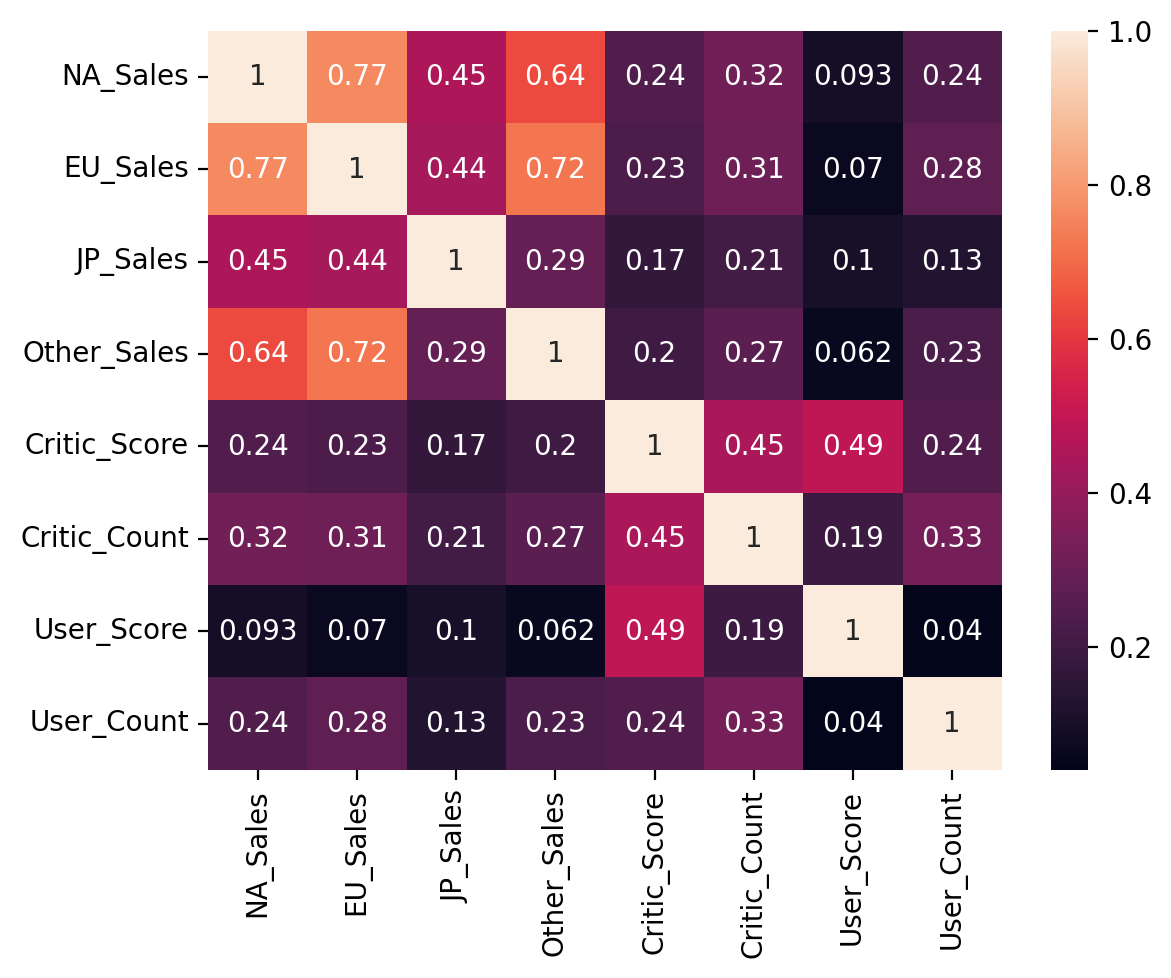

In [80]:
plt.figure(dpi=200)
sns.heatmap(vgs_2b.corr(), annot = True)

In [81]:
# Split data into input and output variables
X = vgs_2b[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]
y = vgs_2b[['NA_Sales','EU_Sales','JP_Sales']] 

In [82]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
#scaling the dataset

scale.fit(X_train) 
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [84]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# FOR NA SALES

In [85]:
# Extracting NA_Sales as the dependent variable
y_train_na = y_train['NA_Sales']
y_test_na = y_test['NA_Sales']

In [86]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_na)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_na)
y_pred_rf = rf.predict(X_test_scaled)
#print("Random Forest Regression MSE:", mean_squared_error(y_test_eu, y_pred_rf))

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train_na)
y_pred_gb = gb.predict(X_test_scaled)
#print("Gradient Boosting Regression MSE:", mean_squared_error(y_test_eu, y_pred_gb))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_na)
y_pred_lasso = lasso.predict(X_test_scaled)
#print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_na)
y_pred_svr = svr.predict(X_test_scaled)
#print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled, y_train_na)
y_pred_kn = kn.predict(X_test_scaled)

In [87]:
# Test and calculate the evaluation metrics
print("The evaluation metrics for all critics and users against NA Sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test_na, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_na, y_pred)
    r2 = r2_score(y_test_na, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all critics and users against NA Sales

Linear Regression - Mean Squared Error: 0.9415, Root Mean Squared Error: 0.9703, Mean Absolute Error: 0.2914, R-squared Score: 0.0871
Random Forest Regression - Mean Squared Error: 0.9577, Root Mean Squared Error: 0.9786, Mean Absolute Error: 0.2716, R-squared Score: 0.0714
Gradient Boosting Regression - Mean Squared Error: 0.9261, Root Mean Squared Error: 0.9624, Mean Absolute Error: 0.2545, R-squared Score: 0.1020
Lasso Regression - Mean Squared Error: 0.9579, Root Mean Squared Error: 0.9787, Mean Absolute Error: 0.2810, R-squared Score: 0.0712
Support Vector Regression - Mean Squared Error: 0.9985, Root Mean Squared Error: 0.9992, Mean Absolute Error: 0.2453, R-squared Score: 0.0318
K Neighbors Regression - Mean Squared Error: 1.0345, Root Mean Squared Error: 1.0171, Mean Absolute Error: 0.2818, R-squared Score: -0.0030


# For JP SALES

In [88]:
# Extracting JP_Sales as the dependent variable
y_train_jp = y_train['JP_Sales']
y_test_jp = y_test['JP_Sales']

In [89]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_jp)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_jp)
y_pred_rf = rf.predict(X_test_scaled)
#print("Random Forest Regression MSE:", mean_squared_error(y_test_eu, y_pred_rf))

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train_jp)
y_pred_gb = gb.predict(X_test_scaled)
#print("Gradient Boosting Regression MSE:", mean_squared_error(y_test_eu, y_pred_gb))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_jp)
y_pred_lasso = lasso.predict(X_test_scaled)
#print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_jp)
y_pred_svr = svr.predict(X_test_scaled)
#print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled, y_train_jp)
y_pred_kn = kn.predict(X_test_scaled)

In [90]:
# Test and calculate the evaluation metrics
print("The evaluation metrics for all critics and users against JP Sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test_jp, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_jp, y_pred)
    r2 = r2_score(y_test_jp, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all critics and users against JP Sales

Linear Regression - Mean Squared Error: 0.0913, Root Mean Squared Error: 0.3022, Mean Absolute Error: 0.1184, R-squared Score: 0.0581
Random Forest Regression - Mean Squared Error: 0.0982, Root Mean Squared Error: 0.3133, Mean Absolute Error: 0.1203, R-squared Score: -0.0121
Gradient Boosting Regression - Mean Squared Error: 0.0916, Root Mean Squared Error: 0.3027, Mean Absolute Error: 0.1133, R-squared Score: 0.0554
Lasso Regression - Mean Squared Error: 0.0970, Root Mean Squared Error: 0.3115, Mean Absolute Error: 0.1189, R-squared Score: -0.0005
Support Vector Regression - Mean Squared Error: 0.0973, Root Mean Squared Error: 0.3119, Mean Absolute Error: 0.1347, R-squared Score: -0.0030
K Neighbors Regression - Mean Squared Error: 0.1131, Root Mean Squared Error: 0.3363, Mean Absolute Error: 0.1236, R-squared Score: -0.1665


# For EU Sales

In [91]:
# Extracting EU_Sales as the dependent variable
y_train_eu = y_train['EU_Sales']
y_test_eu = y_test['EU_Sales']

In [92]:
# Applying regressors to the data

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_eu)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_eu)
y_pred_rf = rf.predict(X_test_scaled)
#print("Random Forest Regression MSE:", mean_squared_error(y_test_eu, y_pred_rf))

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train_eu)
y_pred_gb = gb.predict(X_test_scaled)
#print("Gradient Boosting Regression MSE:", mean_squared_error(y_test_eu, y_pred_gb))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_eu)
y_pred_lasso = lasso.predict(X_test_scaled)
#print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_eu)
y_pred_svr = svr.predict(X_test_scaled)
#print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_scaled, y_train_eu)
y_pred_kn = kn.predict(X_test_scaled)



In [93]:
# Test and calculate the evaluation metrics
print("The evaluation metrics for all critics and users against EU Sales\n")
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_lasso, y_pred_svr, y_pred_kn]
names = ["Linear", "Random Forest", "Gradient Boosting", "Lasso", "Support Vector", "K Neighbors"]
for i, y_pred in enumerate(y_preds):
    mse = mean_squared_error(y_test_eu, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_eu, y_pred)
    r2 = r2_score(y_test_eu, y_pred)
    print(f"{names[i]} Regression - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}, Mean Absolute Error: {mae:.4f}, R-squared Score: {r2:.4f}")


The evaluation metrics for all critics and users against EU Sales

Linear Regression - Mean Squared Error: 0.4474, Root Mean Squared Error: 0.6689, Mean Absolute Error: 0.1791, R-squared Score: 0.0781
Random Forest Regression - Mean Squared Error: 0.4597, Root Mean Squared Error: 0.6780, Mean Absolute Error: 0.1726, R-squared Score: 0.0527
Gradient Boosting Regression - Mean Squared Error: 0.4534, Root Mean Squared Error: 0.6733, Mean Absolute Error: 0.1605, R-squared Score: 0.0658
Lasso Regression - Mean Squared Error: 0.4657, Root Mean Squared Error: 0.6824, Mean Absolute Error: 0.1832, R-squared Score: 0.0403
Support Vector Regression - Mean Squared Error: 0.4642, Root Mean Squared Error: 0.6813, Mean Absolute Error: 0.1598, R-squared Score: 0.0435
K Neighbors Regression - Mean Squared Error: 0.4740, Root Mean Squared Error: 0.6885, Mean Absolute Error: 0.1727, R-squared Score: 0.0232


## Component 2d

#### Platform, Genre and Ratings are considered as the relevant variables for classification against all of the variables influenced by the human experience

In [94]:
vgs_2d = vgs_ob[['Platform', 'Genre', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']].copy()
vgs_2d

,Platform,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,Sports,82.53,76.0,51.0,8.000000,322.000000,E
2,Wii,Racing,35.52,82.0,73.0,8.300000,709.000000,E
3,Wii,Sports,32.77,80.0,73.0,8.000000,192.000000,E
6,DS,Platform,29.80,89.0,65.0,8.500000,431.000000,E
7,Wii,Misc,28.92,58.0,41.0,6.600000,129.000000,E
...,...,...,...,...,...,...,...,...
16701,GC,Puzzle,0.01,53.0,4.0,6.033333,38.000000,E
16702,DS,Puzzle,0.01,48.0,10.0,6.266667,33.000000,E
16706,PC,Strategy,0.01,60.0,12.0,7.200000,13.000000,E10+
16708,DS,Simulation,0.01,62.0,8.0,6.266667,9.666667,E


# Ratings

In [95]:
vgs_2d["Rating"].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [96]:
vgs_2d = vgs_2d[~vgs_2d['Rating'].isin(['AO', 'K-A', 'RP'])].reset_index(drop=True)

In [97]:
vgs_2d['Genre_LabelEncoded'] = le.fit_transform(vgs_2d['Genre'])
vgs_2d['Platform_LabelEncoded'] = le.fit_transform(vgs_2d['Platform'])
vgs_2d['Rating_LabelEncoded'] = le.fit_transform(vgs_2d['Rating'])
vgs_2d.drop(['Rating', 'Platform', 'Genre'], axis=1, inplace=True)
vgs_2d

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Genre_LabelEncoded,Platform_LabelEncoded,Rating_LabelEncoded
0,82.53,76.0,51.0,8.000000,322.000000,10,12,0
1,35.52,82.0,73.0,8.300000,709.000000,6,12,0
2,32.77,80.0,73.0,8.000000,192.000000,10,12,0
3,29.80,89.0,65.0,8.500000,431.000000,4,2,0
4,28.92,58.0,41.0,6.600000,129.000000,3,12,0
...,...,...,...,...,...,...,...,...
9938,0.01,53.0,4.0,6.033333,38.000000,5,4,0
9939,0.01,48.0,10.0,6.266667,33.000000,5,2,0
9940,0.01,60.0,12.0,7.200000,13.000000,11,5,1
9941,0.01,62.0,8.0,6.266667,9.666667,9,2,0


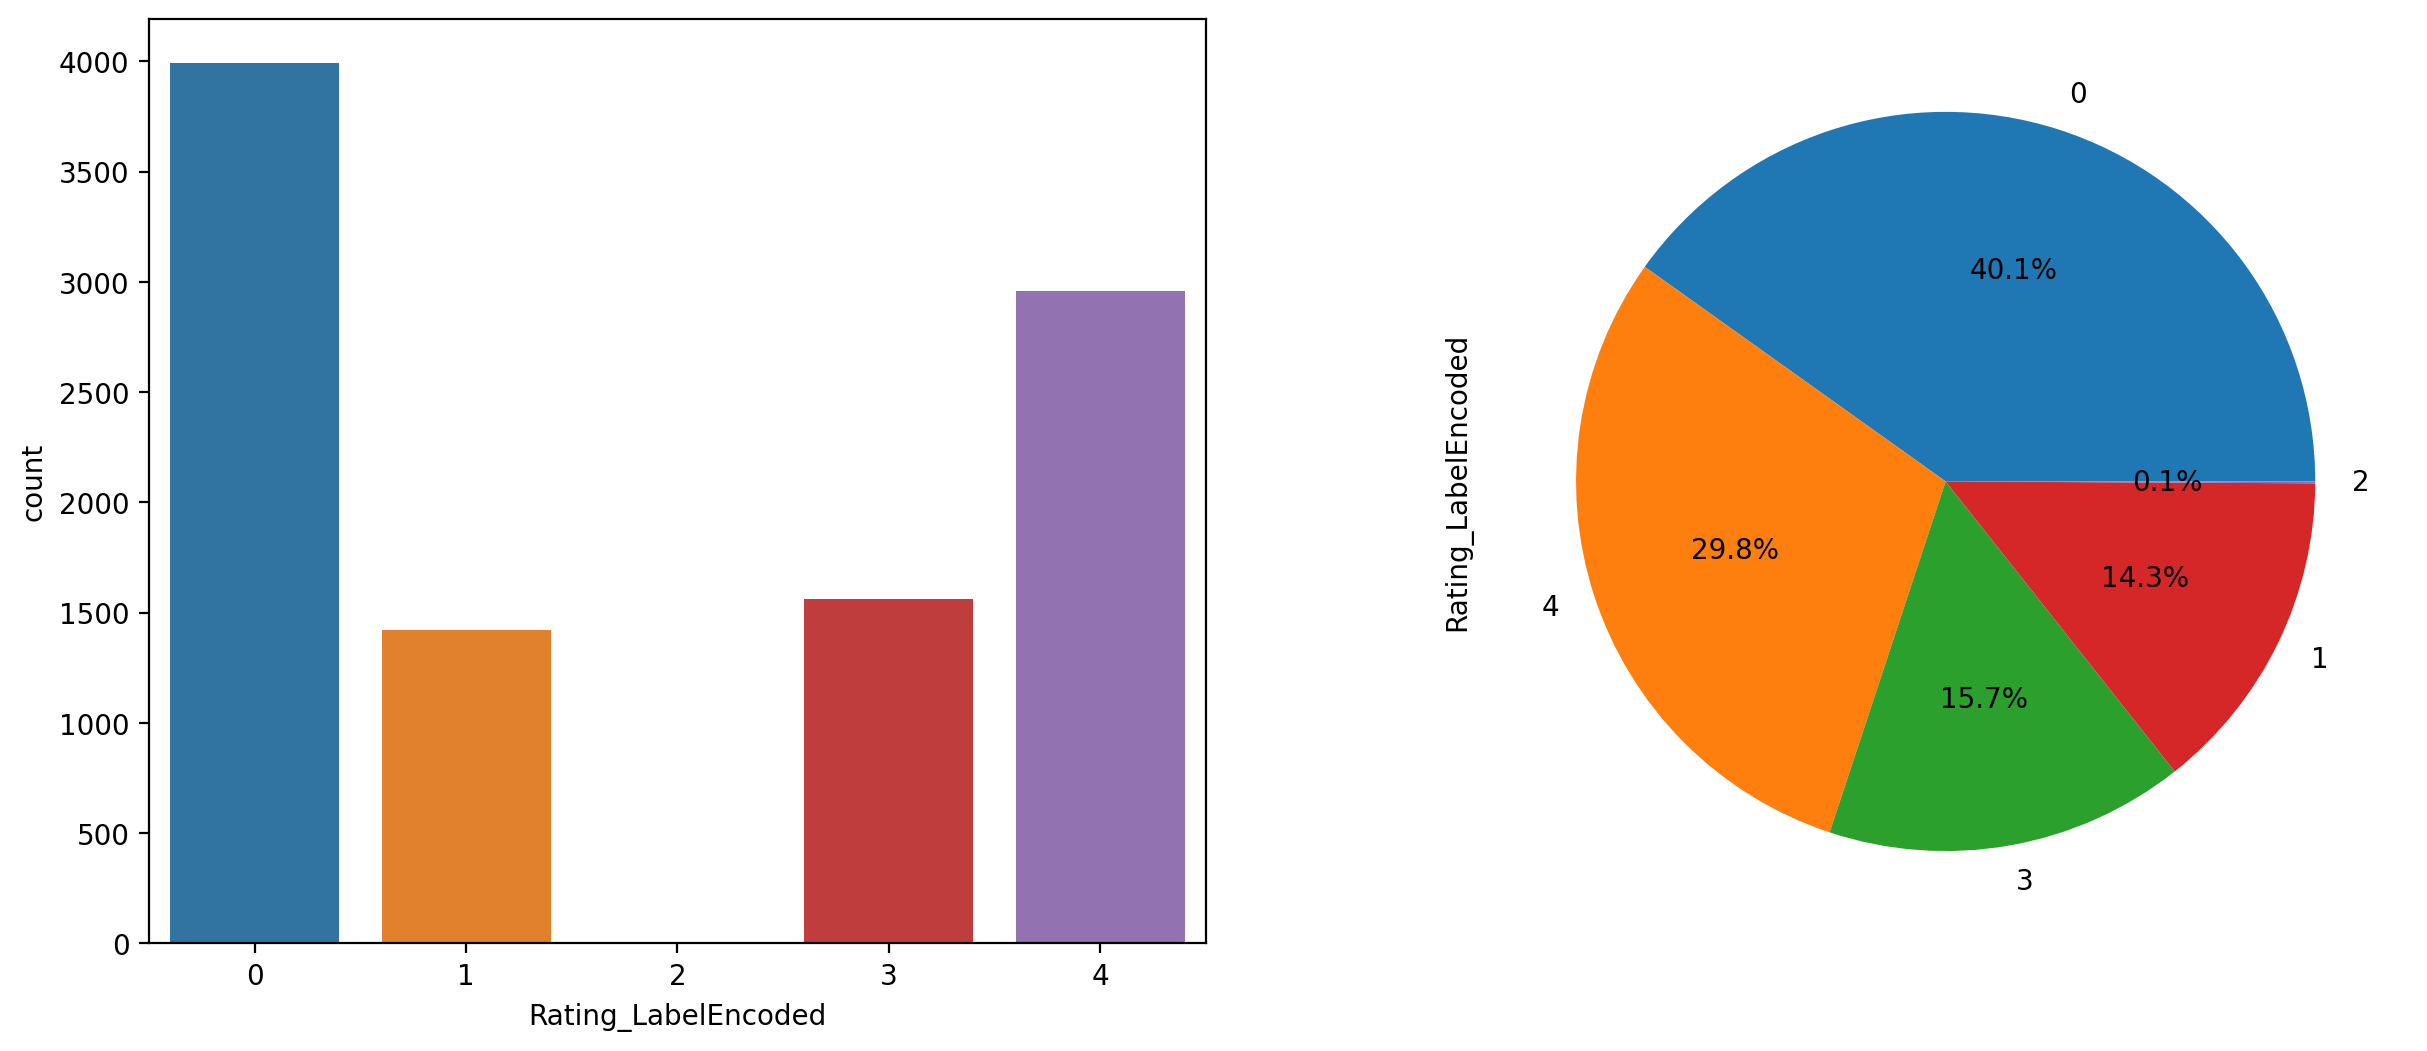

In [98]:
# seaborn plotting of the target variable (class_) of the BMI dataset 
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for th
a = sns.countplot(x = 'Rating_LabelEncoded', data = vgs_2d, ax=ax_position[0]) #ax_position[0] spe
a = vgs_2d['Rating_LabelEncoded'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #a

In [99]:
X = vgs_2d.drop(['Genre_LabelEncoded', 'Platform_LabelEncoded', 'Rating_LabelEncoded'], axis=1)
y = vgs_2d['Rating_LabelEncoded']

In [100]:
# import SMOTE 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created

In [101]:
# apply SMOTE to resample the dataset 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

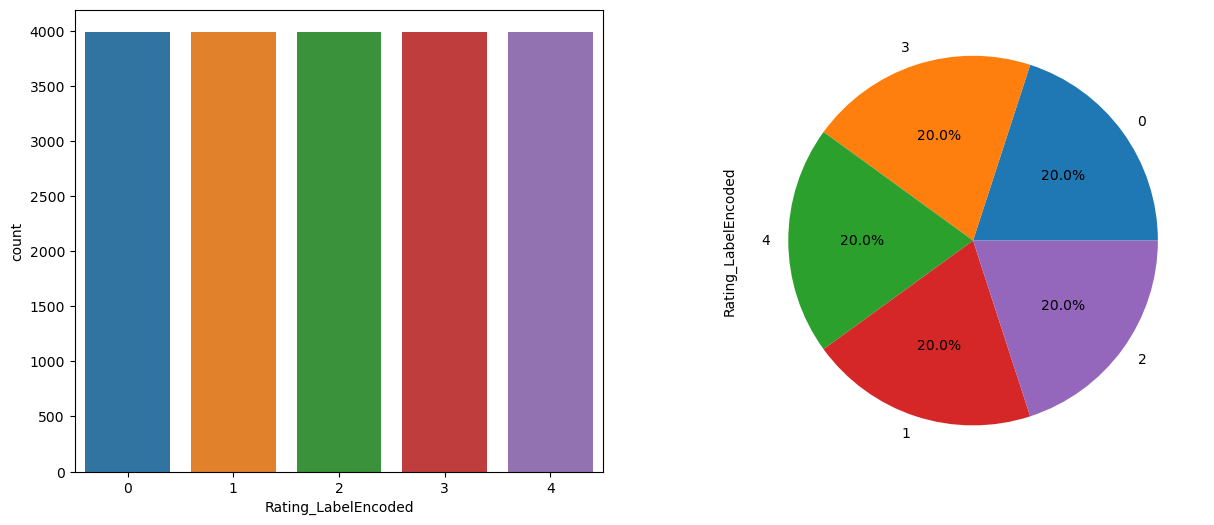

In [102]:
# Plot of the dataset 
balrat_vgs_2d = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced dat
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='Rating_LabelEncoded',data=balrat_vgs_2d, ax=ax[0]) # assigning each of the plot to th
a= balrat_vgs_2d['Rating_LabelEncoded'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning ea

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
log_ratings_pred = log_reg.predict(X_test_scaled)
knc = KNeighborsClassifier()
knc.fit(X_train_scaled,y_train)
knc_ratings_pred = knc.predict(X_test_scaled)
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
gnb_ratings_pred = gnb.predict(X_test_scaled)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_ratings_pred = dtc.predict(X_test_scaled)
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_ratings_pred = rfc.predict(X_test_scaled)
svc = SVC()
svc.fit(X_train_scaled,y_train)
svc_ratings_pred = svc.predict(X_test_scaled)

In [106]:
# Logistic Regression Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test,log_ratings_pred))

# K Nearest Neighbors Classification Report
print("K Nearest Neighbors Classification Report:")
print(classification_report(y_test,knc_ratings_pred))

# Gaussian Naive Bayes Classification Report
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test,gnb_ratings_pred))

# Decision Tree Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test,dtc_ratings_pred))

# Random Forest Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test,rfc_ratings_pred))

# Support Vector Classification Report
print("Support Vector Classification Report:")
print(classification_report(y_test,svc_ratings_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.36      0.32       814
           1       0.21      0.07      0.11       765
           2       0.42      0.61      0.50       799
           3       0.50      0.47      0.48       818
           4       0.27      0.27      0.27       795

    accuracy                           0.36      3991
   macro avg       0.34      0.36      0.34      3991
weighted avg       0.34      0.36      0.34      3991

K Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.39      0.39       814
           1       0.41      0.52      0.46       765
           2       0.90      1.00      0.95       799
           3       0.59      0.58      0.58       818
           4       0.40      0.24      0.30       795

    accuracy                           0.55      3991
   macro avg       0.53      0.55      0.53  

In [107]:
# Logistic Regression
print("Confusion Matrix for Logistic Regression:\n")
print(confusion_matrix(y_test, log_ratings_pred))

# K-Nearest Neighbors
print("Confusion Matrix for K-Nearest Neighbors:\n")
print(confusion_matrix(y_test, knc_ratings_pred))

# Gaussian Naive Bayes
print("Confusion Matrix for Gaussian Naive Bayes:\n")
print(confusion_matrix(y_test, gnb_ratings_pred))

# Decision Tree Classifier
print("Confusion Matrix for Decision Tree Classifier:\n")
print(confusion_matrix(y_test, dtc_ratings_pred))

# Random Forest Classifier
print("Confusion Matrix for Random Forest Classifier:\n")
print(confusion_matrix(y_test, rfc_ratings_pred))

# Support Vector Classifier
print("Confusion Matrix for Support Vector Classifier:\n")
print(confusion_matrix(y_test, svc_ratings_pred))


Confusion Matrix for Logistic Regression:

[[295  56 235  82 146]
 [236  57 193 129 150]
 [165  57 488   0  89]
 [104  45 101 386 182]
 [215  57 134 177 212]]
Confusion Matrix for K-Nearest Neighbors:

[[319 235  28 111 121]
 [175 400  33  73  84]
 [  0   0 799   0   0]
 [114 136  15 472  81]
 [234 205  17 150 189]]
Confusion Matrix for Gaussian Naive Bayes:

[[ 42  52 542  27 151]
 [ 31  46 498  40 150]
 [  0  16 716   0  67]
 [ 20  46 287 190 275]
 [ 38  42 443  44 228]]
Confusion Matrix for Decision Tree Classifier:

[[310 184   8  85 227]
 [134 450   0  67 114]
 [  2   2 791   2   2]
 [ 67  68   3 569 111]
 [203 133   3 151 305]]
Confusion Matrix for Random Forest Classifier:

[[401 153   3  70 187]
 [ 99 543   2  45  76]
 [  2   0 797   0   0]
 [ 54  31   3 659  71]
 [190 102   2 140 361]]
Confusion Matrix for Support Vector Classifier:

[[211 168 227  76 132]
 [132 178 208 114 133]
 [  0   0 752   0  47]
 [ 71  54 100 412 181]
 [142 111 159 167 216]]


In [108]:
# Checking for overfitting
train_accuracy = rfc.score(X_train_scaled, y_train)
test_accuracy = rfc.score(X_test_scaled, y_test)
print("Training accuracy: {:.2f}".format(train_accuracy))
print("Testing accuracy: {:.2f}".format(test_accuracy))

Training accuracy: 1.00
Testing accuracy: 0.69


In [109]:
# adding regularization to limit overfitting by adding max features
rfc = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=5, random_state=42)
rfc.fit(X_train_scaled, y_train)

#Making predictions
rfc_ratings_pred = rfc.predict(X_test_scaled)
model_accuracy = accuracy_score(y_test, rfc_ratings_pred)
print("Test accuracy: ", model_accuracy)

Test accuracy:  0.6787772488098222


# Genre

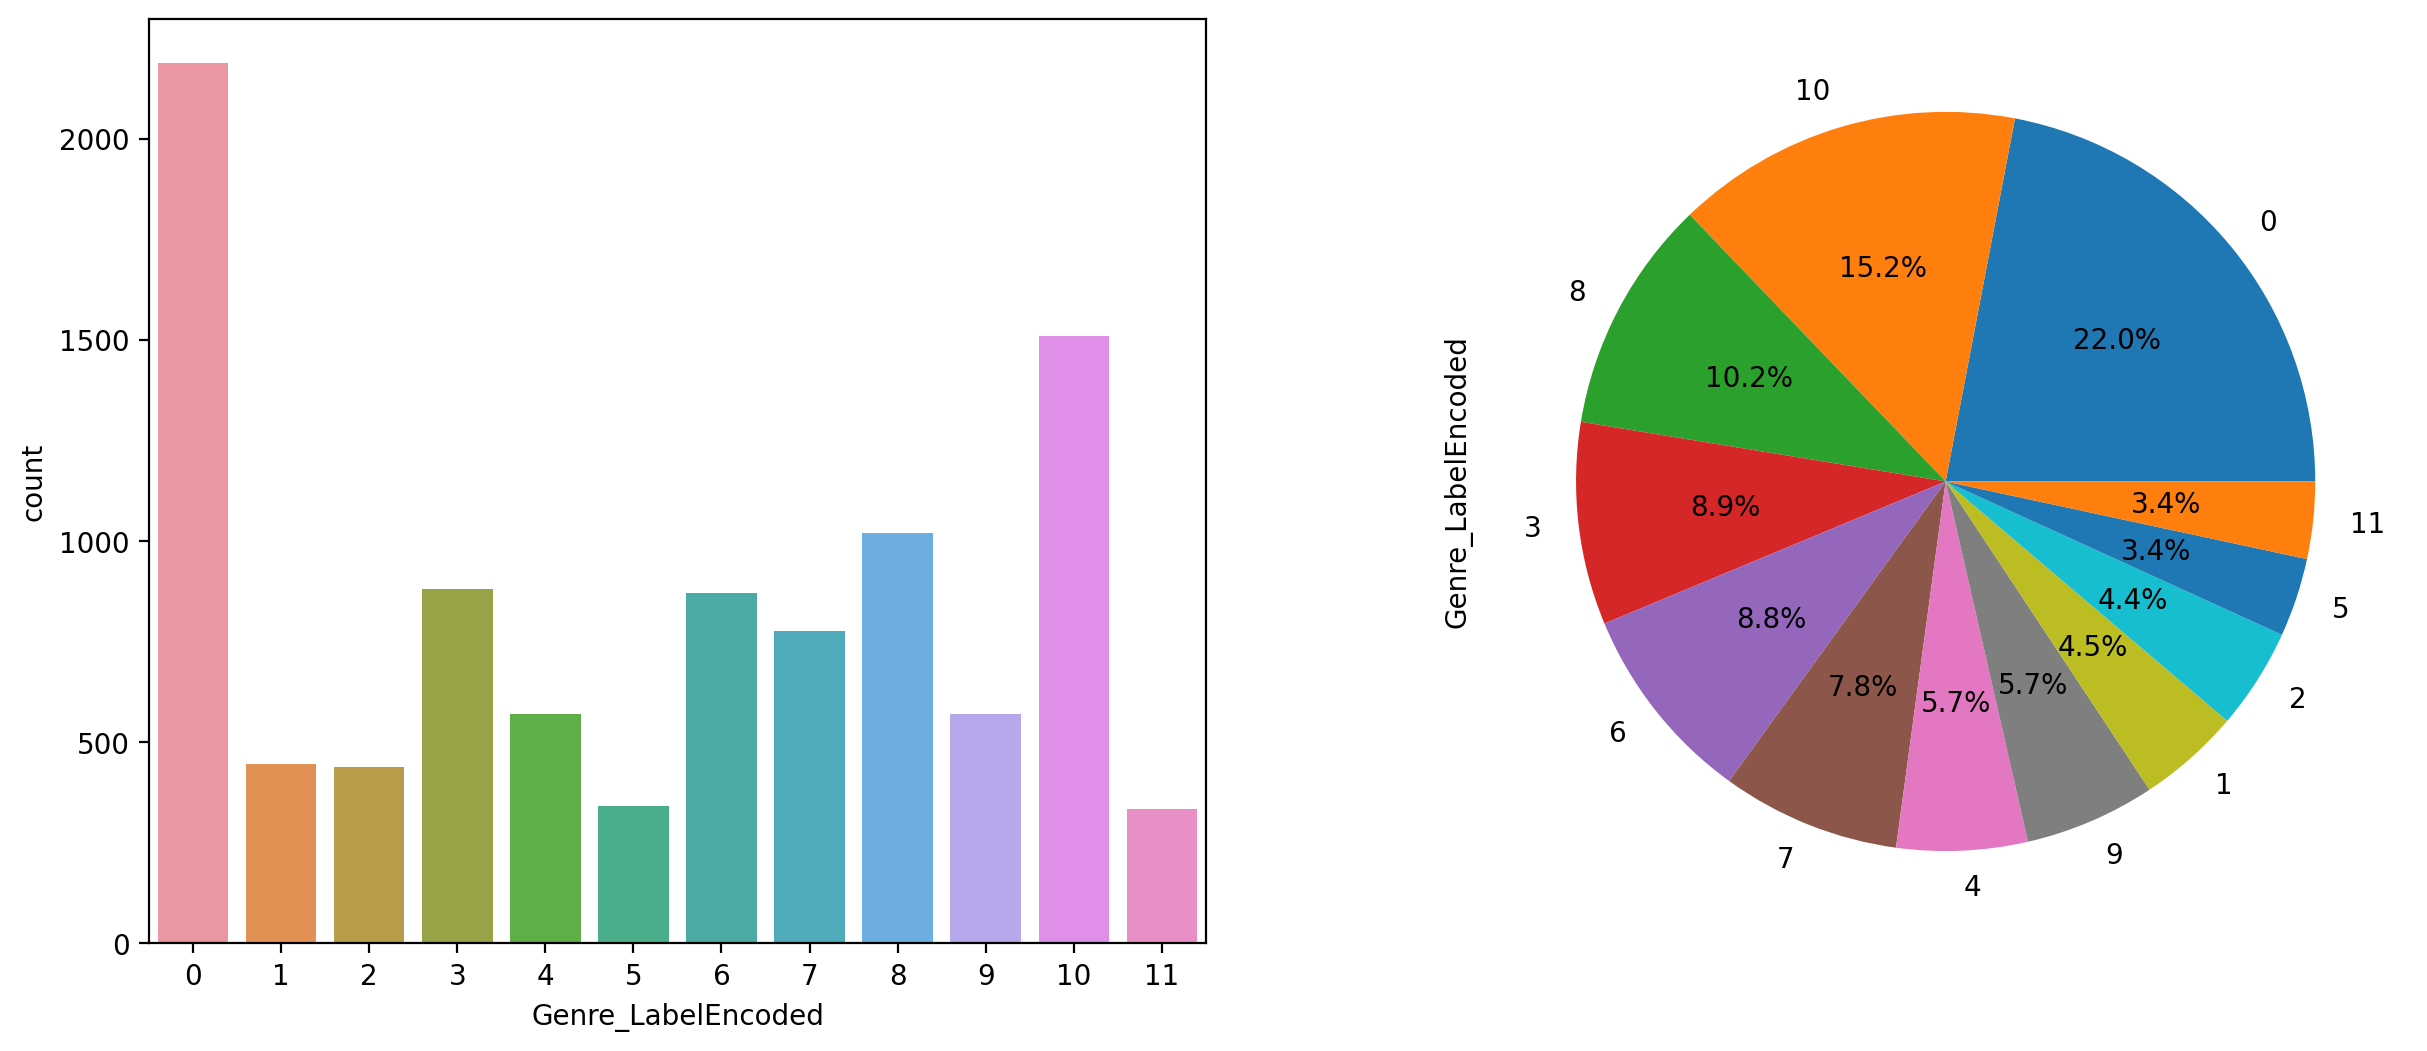

In [110]:
# seaborn plotting of the target variable (class_) of the BMI dataset 
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for th
a = sns.countplot(x = 'Genre_LabelEncoded', data = vgs_2d, ax=ax_position[0]) #ax_position[0] spe
a = vgs_2d['Genre_LabelEncoded'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #a

In [111]:
X = vgs_2d.drop(['Genre_LabelEncoded', 'Platform_LabelEncoded', 'Rating_LabelEncoded'], axis=1)
y = vgs_2d['Genre_LabelEncoded']

In [112]:
# apply SMOTE to resample the dataset 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

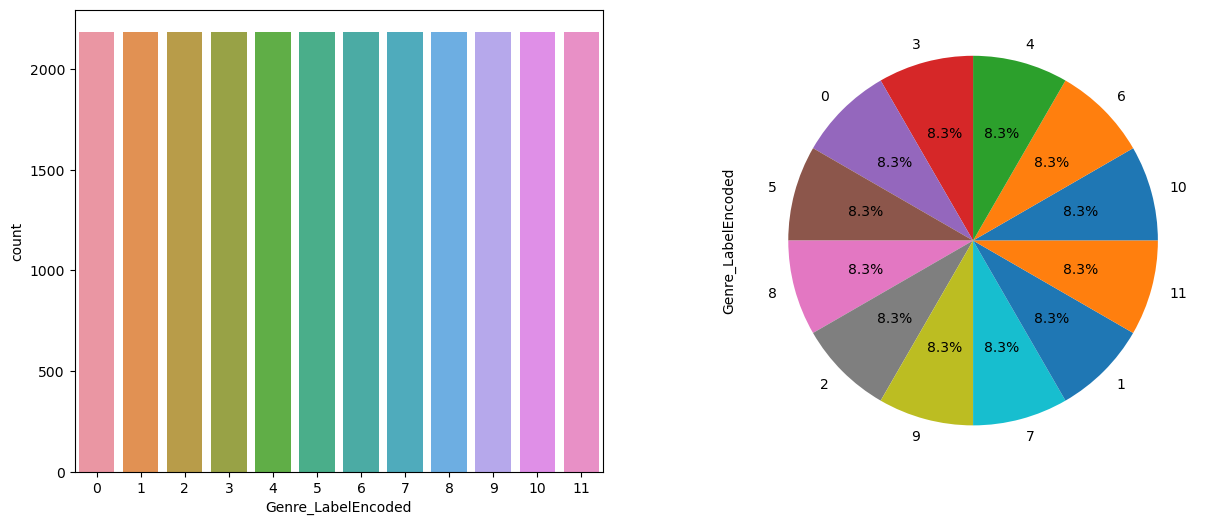

In [113]:
# Plot of the dataset 
balgen_vgs_2d = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced dat
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='Genre_LabelEncoded',data=balgen_vgs_2d, ax=ax[0]) # assigning each of the plot to th
a= balgen_vgs_2d['Genre_LabelEncoded'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning ea

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
log_ratings_pred = log_reg.predict(X_test_scaled)
knc = KNeighborsClassifier()
knc.fit(X_train_scaled,y_train)
knc_ratings_pred = knc.predict(X_test_scaled)
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
gnb_ratings_pred = gnb.predict(X_test_scaled)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_ratings_pred = dtc.predict(X_test_scaled)
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_ratings_pred = rfc.predict(X_test_scaled)
svc = SVC()
svc.fit(X_train_scaled,y_train)
svc_ratings_pred = svc.predict(X_test_scaled)

In [117]:
# Logistic Regression Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test,log_ratings_pred))

# K Nearest Neighbors Classification Report
print("K Nearest Neighbors Classification Report:")
print(classification_report(y_test,knc_ratings_pred))

# Gaussian Naive Bayes Classification Report
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test,gnb_ratings_pred))

# Decision Tree Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test,dtc_ratings_pred))

# Random Forest Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test,rfc_ratings_pred))

# Support Vector Classification Report
print("Support Vector Classification Report:")
print(classification_report(y_test,svc_ratings_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.08      0.09       406
           1       0.09      0.13      0.10       416
           2       0.08      0.05      0.06       434
           3       0.13      0.14      0.13       426
           4       0.15      0.01      0.02       441
           5       0.12      0.15      0.13       442
           6       0.00      0.00      0.00       466
           7       0.14      0.27      0.18       441
           8       0.21      0.33      0.26       435
           9       0.18      0.04      0.06       443
          10       0.16      0.45      0.23       451
          11       0.13      0.04      0.06       448

    accuracy                           0.14      5249
   macro avg       0.12      0.14      0.11      5249
weighted avg       0.12      0.14      0.11      5249

K Nearest Neighbors Classification Report:
              precision    recall  f1-score   s

In [118]:
# Logistic Regression
print("Confusion Matrix for Logistic Regression:\n")
print(confusion_matrix(y_test, log_ratings_pred))

# K-Nearest Neighbors
print("Confusion Matrix for K-Nearest Neighbors:\n")
print(confusion_matrix(y_test, knc_ratings_pred))

# Gaussian Naive Bayes
print("Confusion Matrix for Gaussian Naive Bayes:\n")
print(confusion_matrix(y_test, gnb_ratings_pred))

# Decision Tree Classifier
print("Confusion Matrix for Decision Tree Classifier:\n")
print(confusion_matrix(y_test, dtc_ratings_pred))

# Random Forest Classifier
print("Confusion Matrix for Random Forest Classifier:\n")
print(confusion_matrix(y_test, rfc_ratings_pred))

# Support Vector Classifier
print("Confusion Matrix for Support Vector Classifier:\n")
print(confusion_matrix(y_test, svc_ratings_pred))

Confusion Matrix for Logistic Regression:

[[ 32  53  21  36   0  46   0  54  78   4  70  12]
 [ 20  54  21  53   0  63   0  87  27   7  82   2]
 [ 38  54  20  33   3  25   0  87  61   5  99   9]
 [ 27  59  28  60   4  44   0  37  39  10 113   5]
 [ 26  47  25  48   4  68   0  76  45   4  95   3]
 [ 24  55  13  47   3  65   0  50  19   7 139  20]
 [ 25  71  17  42   5  56   0  46  52   7 139   6]
 [ 24  40  20  12   3  25   0 120  89  13  73  22]
 [ 19  42  16  20   2  15   0  83 143   3  75  17]
 [ 14  47  27  29   2  69   0  56  43  16 131   9]
 [ 11  40  21  53   0  44   0  41  27   6 204   4]
 [ 11  56  13  33   0  29   0 133  53   9  95  16]]
Confusion Matrix for K-Nearest Neighbors:

[[ 61  42  32  37  45  31  31  32  32  23  12  28]
 [ 26 231  20  29  12  15  13  11  10  10  14  25]
 [ 35  23 241  16  21  13  18  15  13  18  10  11]
 [ 34  46  44 132  29  30  19  13  17  26  24  12]
 [ 45  51  27  18 170  26  15  13  21  26  15  14]
 [ 24  30  26  20  26 232  16   9  10  22  14 

In [119]:
# Checking for overfitting
train_accuracy = rfc.score(X_train_scaled, y_train)
test_accuracy = rfc.score(X_test_scaled, y_test)
print("Training accuracy: {:.2f}".format(train_accuracy))
print("Testing accuracy: {:.2f}".format(test_accuracy))

Training accuracy: 1.00
Testing accuracy: 0.68


In [120]:
# adding regularization to limit overfitting by adding max features
rfc = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=7, random_state=42)
rfc.fit(X_train_scaled, y_train)

#Making predictions
rfc_ratings_pred = rfc.predict(X_test_scaled)
model_accuracy = accuracy_score(y_test, rfc_ratings_pred)
print("Test accuracy: ", model_accuracy)

Test accuracy:  0.6820346732710992


# Platforms

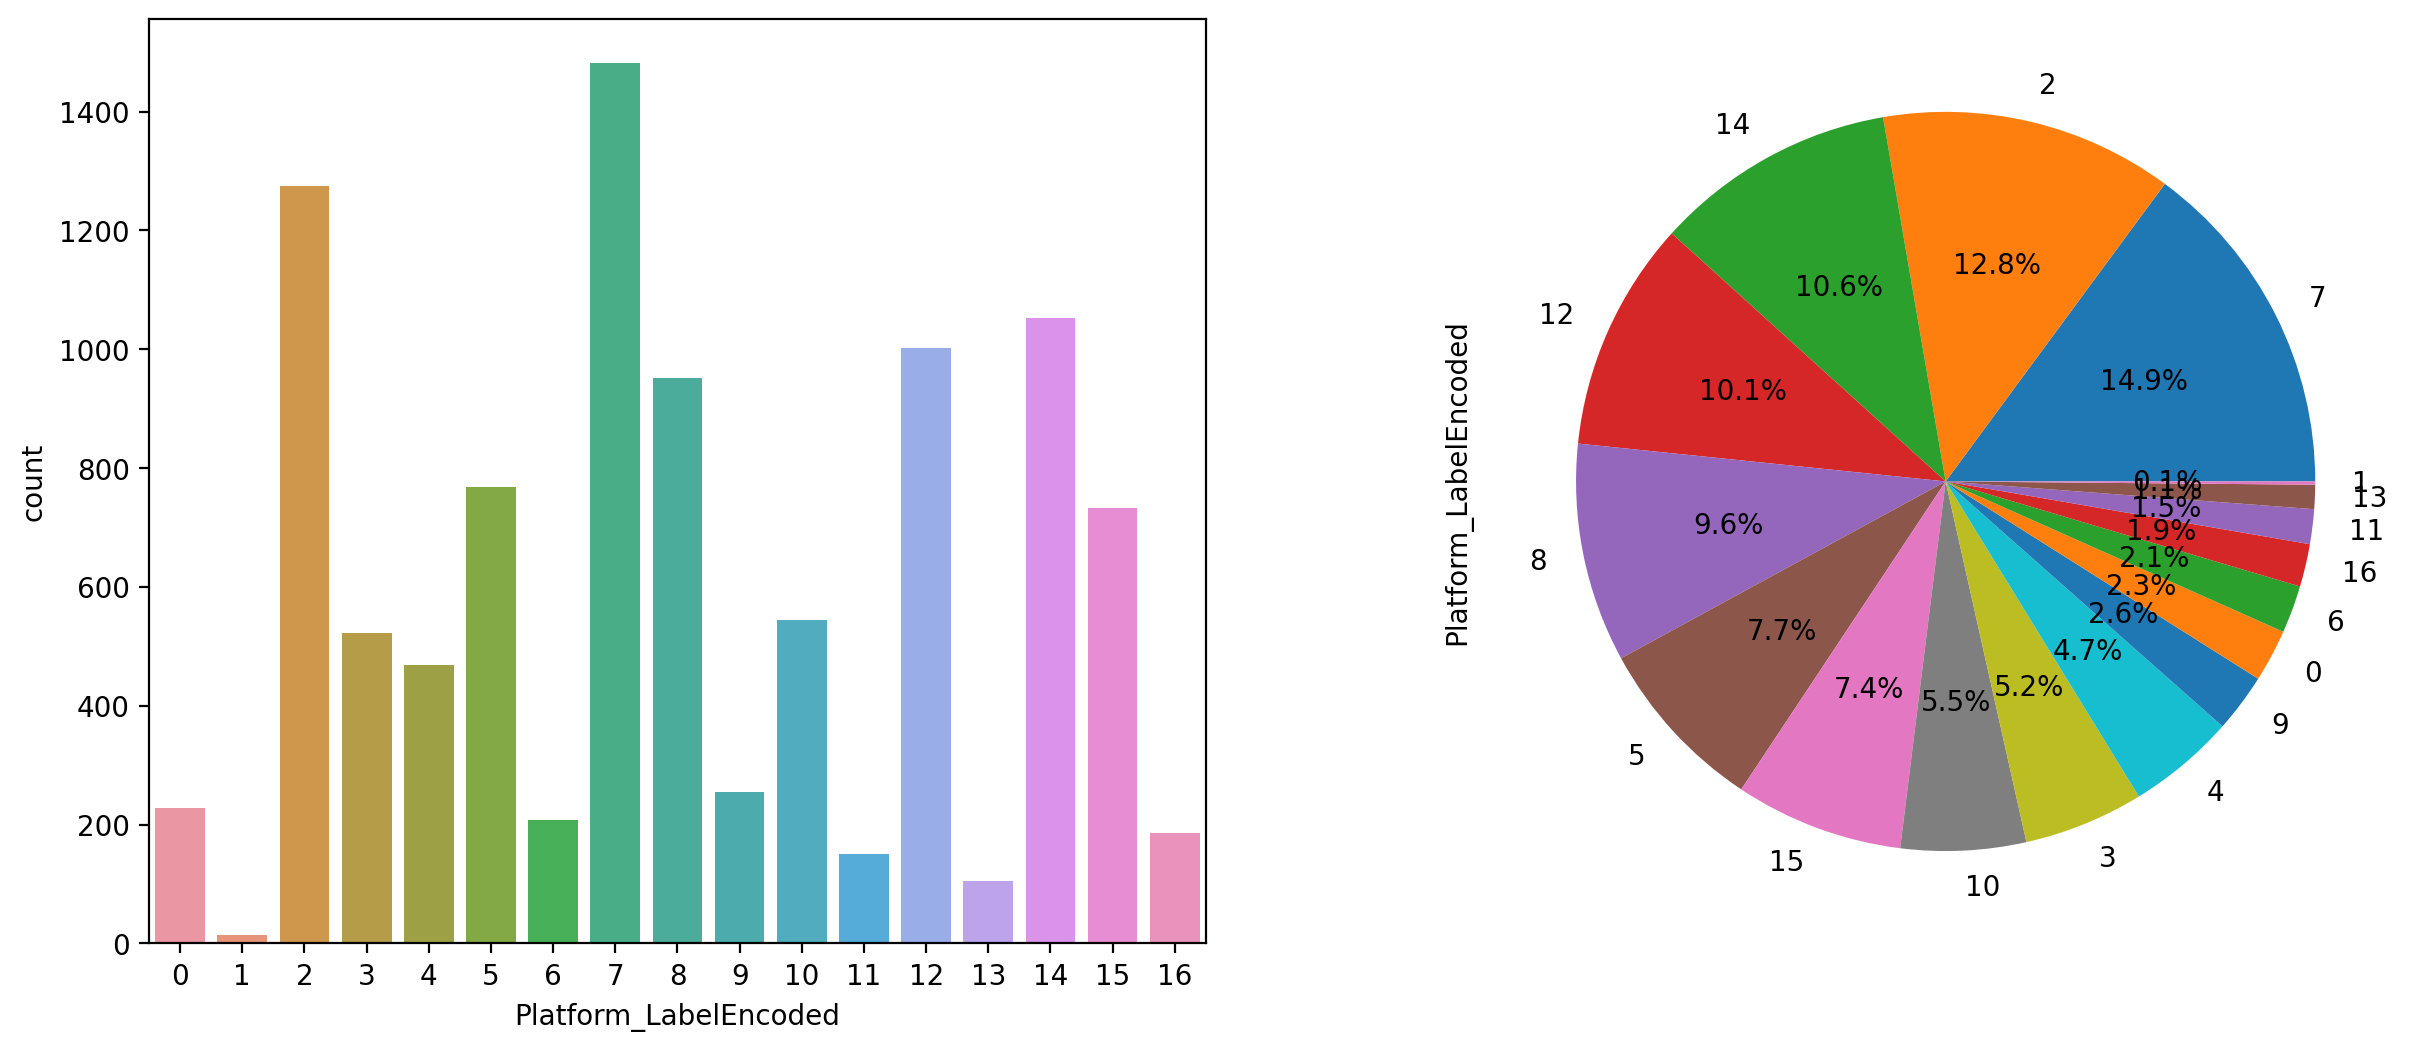

In [121]:
# seaborn plotting of the target variable (class_) of the BMI dataset 
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for th
a = sns.countplot(x = 'Platform_LabelEncoded', data = vgs_2d, ax=ax_position[0]) #ax_position[0] spe
a = vgs_2d['Platform_LabelEncoded'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #a

In [122]:
X = vgs_2d.drop(['Genre_LabelEncoded', 'Platform_LabelEncoded', 'Rating_LabelEncoded'], axis=1)
y = vgs_2d['Platform_LabelEncoded']

In [123]:
# apply SMOTE to resample the dataset 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

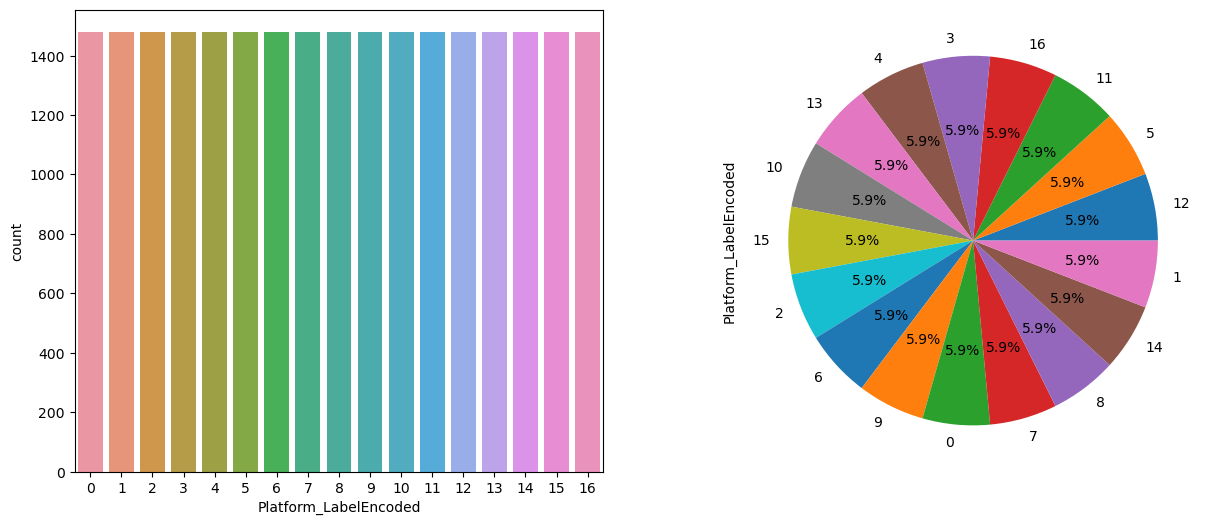

In [124]:
# Plot of the dataset 
balpla_vgs_2d = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced dat
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='Platform_LabelEncoded',data=balpla_vgs_2d, ax=ax[0]) # assigning each of the plot to th
a= balpla_vgs_2d['Platform_LabelEncoded'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning ea

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
log_ratings_pred = log_reg.predict(X_test_scaled)
knc = KNeighborsClassifier()
knc.fit(X_train_scaled,y_train)
knc_ratings_pred = knc.predict(X_test_scaled)
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
gnb_ratings_pred = gnb.predict(X_test_scaled)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_ratings_pred = dtc.predict(X_test_scaled)
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_ratings_pred = rfc.predict(X_test_scaled)
svc = SVC()
svc.fit(X_train_scaled,y_train)
svc_ratings_pred = svc.predict(X_test_scaled)

In [128]:
# Logistic Regression Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test,log_ratings_pred))

# K Nearest Neighbors Classification Report
print("K Nearest Neighbors Classification Report:")
print(classification_report(y_test,knc_ratings_pred))

# Gaussian Naive Bayes Classification Report
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test,gnb_ratings_pred))

# Decision Tree Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test,dtc_ratings_pred))

# Random Forest Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test,rfc_ratings_pred))

# Support Vector Classification Report
print("Support Vector Classification Report:")
print(classification_report(y_test,svc_ratings_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.01      0.02       305
           1       0.40      0.99      0.56       297
           2       0.11      0.10      0.10       295
           3       0.10      0.17      0.12       274
           4       0.04      0.02      0.03       285
           5       0.44      0.20      0.28       313
           6       0.17      0.41      0.24       293
           7       0.21      0.21      0.21       314
           8       0.21      0.03      0.05       309
           9       0.32      0.23      0.27       281
          10       0.16      0.02      0.04       281
          11       0.04      0.00      0.01       281
          12       0.15      0.13      0.14       318
          13       0.20      0.01      0.01       292
          14       0.16      0.43      0.24       287
          15       0.10      0.10      0.10       285
          16       0.22      0.39     

In [129]:
# Logistic Regression
print("Confusion Matrix for Logistic Regression:\n")
print(confusion_matrix(y_test, log_ratings_pred))

# K-Nearest Neighbors
print("Confusion Matrix for K-Nearest Neighbors:\n")
print(confusion_matrix(y_test, knc_ratings_pred))

# Gaussian Naive Bayes
print("Confusion Matrix for Gaussian Naive Bayes:\n")
print(confusion_matrix(y_test, gnb_ratings_pred))

# Decision Tree Classifier
print("Confusion Matrix for Decision Tree Classifier:\n")
print(confusion_matrix(y_test, dtc_ratings_pred))

# Random Forest Classifier
print("Confusion Matrix for Random Forest Classifier:\n")
print(confusion_matrix(y_test, rfc_ratings_pred))

# Support Vector Classifier
print("Confusion Matrix for Support Vector Classifier:\n")
print(confusion_matrix(y_test, svc_ratings_pred))

Confusion Matrix for Logistic Regression:

[[  4  12  12  44  16   2  31   7   0   8   2   3  28   1  79  25  31]
 [  0 293   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  3  10  29  41  13   3  54  24   3   3   2   2  22   0  32  20  34]
 [  1  39  14  46   9   5  88  14   0   0   0   1  19   0   3   7  28]
 [  5  54  22  44   6   1  41  29   2   3   3   1  14   1  14  17  28]
 [  1  44   8  28  14  64  27  11   2  43   2   3   5   1   9  13  38]
 [  0 100  22  30   2   0 119   6   0   0   0   0   7   0   0   5   2]
 [  3  34  18  28  11   4  43  66   2   3   0   0  20   0  32  24  26]
 [  9  14   7  10   7   7  16   9   9  26   6   5  19   1  96  17  51]
 [  1  16   3  14   4   9  14   7   7  66   2   1  10   0  69  23  35]
 [  8   9  23  30  15   3  31  33   5   1   6   6  11   1  49  26  24]
 [  2  25  17  39  16   3  47  17   1   4   3   1   5   0  56  23  22]
 [  2  11  19  34  10   5  43  34   2   1   6   1  41   1  56  18  34]
 [  2  10  10  27  15   5  55   0 

In [130]:
# Checking for overfitting
train_accuracy = rfc.score(X_train_scaled, y_train)
test_accuracy = rfc.score(X_test_scaled, y_test)
print("Training accuracy: {:.2f}".format(train_accuracy))
print("Testing accuracy: {:.2f}".format(test_accuracy))

Training accuracy: 1.00
Testing accuracy: 0.69


In [131]:
# adding regularization to limit overfitting by adding max features
rfc = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=5, random_state=42)
rfc.fit(X_train_scaled, y_train)

#Making predictions
rfc_ratings_pred = rfc.predict(X_test_scaled)
model_accuracy = accuracy_score(y_test, rfc_ratings_pred)
print("Test accuracy: ", model_accuracy)

Test accuracy:  0.6846703733121525


## CLUSTERING

In [245]:
vgs_cluster = vgs_ob[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]
vgs_object = vgs_ob[['Platform', 'Genre', 'Rating']]
vgs_objects = vgs_ob[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Developer', 'Rating']]

In [246]:
vgs_objects_dummies = pd.get_dummies(vgs_object)
vgs_clustering = pd.concat([vgs_cluster, vgs_objects_dummies], axis=1)

In [247]:
scaled_vgs_clustering =scaler.fit_transform(vgs_clustering)
(scaled_vgs_clustering)

array([[1.00000000e+00, 1.00000000e+00, 5.80000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.79110251e-01, 4.40607735e-01, 5.83076923e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.77417795e-01, 3.77417127e-01, 5.04615385e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.45303867e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

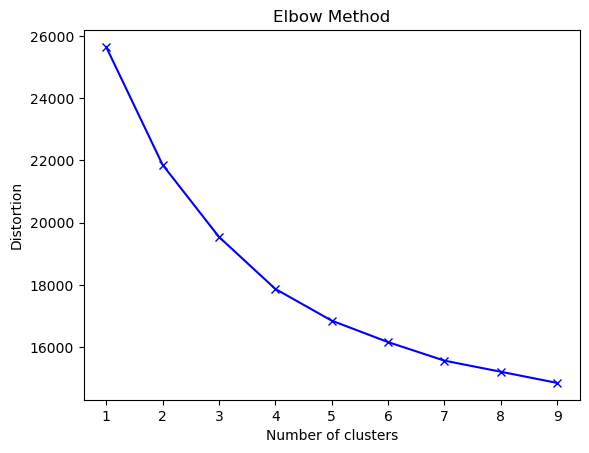

In [248]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_vgs_clustering)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


In [249]:
kmeans = KMeans(n_clusters=4, random_state=42)
C_labels = kmeans.fit_predict(scaled_vgs_clustering)

In [250]:
C_labels

array([1, 1, 1, ..., 0, 1, 2])

# For Genre

In [251]:
scaled_vgs_clustering

array([[1.00000000e+00, 1.00000000e+00, 5.80000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.79110251e-01, 4.40607735e-01, 5.83076923e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.77417795e-01, 3.77417127e-01, 5.04615385e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.45303867e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [252]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = vgs_objects['Genre']



In [253]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.150
Rand Index Score: 0.074
Mutual Information Score: 0.149

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.841
Silhouette Coefficient: 0.209
Calinski Harabasz Score: 1443.384


## DB SCAN

In [254]:
# Define the DBSCAN model with eps and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
# Fit the model and predict the labels
labels = dbscan.fit_predict(scaled_vgs_clustering)
# Get the true class labels
y_true = vgs_objects['Genre']

In [255]:
 #determine and print evaluation metrics

print(f'External Evaluation Measures')
print(f'********************************')
# Calculate the v-measure score
v_measure = v_measure_score(y_true, labels)
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
print(f'Internal Evaluation Measures')
print(f'********************************')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, labels)
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.531
Rand Index Score: 0.051
Mutual Information Score: 0.508

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.125
Silhouette Coefficient: 0.548
Calinski Harabasz Score: 129.039


# For Platform

In [256]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = vgs_objects['Platform']


In [257]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.071
Rand Index Score: 0.036
Mutual Information Score: 0.070

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.841
Silhouette Coefficient: 0.209
Calinski Harabasz Score: 1443.384


# DB Scan

In [258]:
# Define the DBSCAN model with eps and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
# Fit the model and predict the labels
labels = dbscan.fit_predict(scaled_vgs_clustering)
# Get the true class labels
y_true = vgs_objects['Platform']

In [259]:
 #determine and print evaluation metrics

print(f'External Evaluation Measures')
print(f'********************************')
# Calculate the v-measure score
v_measure = v_measure_score(y_true, labels)
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
print(f'Internal Evaluation Measures')
print(f'********************************')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, labels)
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.562
Rand Index Score: 0.064
Mutual Information Score: 0.535

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.125
Silhouette Coefficient: 0.548
Calinski Harabasz Score: 129.039


# For Rating

In [260]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = vgs_objects['Rating']

In [261]:
##### Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.995
Rand Index Score: 0.998
Mutual Information Score: 0.995

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.841
Silhouette Coefficient: 0.209
Calinski Harabasz Score: 1443.384


# DB Scan

In [262]:
# Define the DBSCAN model with eps and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
# Fit the model and predict the labels
labels = dbscan.fit_predict(scaled_vgs_clustering)
# Get the true class labels
y_true = vgs_objects['Platform']

In [263]:
 #determine and print evaluation metrics

print(f'External Evaluation Measures')
print(f'********************************')
# Calculate the v-measure score
v_measure = v_measure_score(y_true, labels)
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
print(f'Internal Evaluation Measures')
print(f'********************************')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, labels)
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.562
Rand Index Score: 0.064
Mutual Information Score: 0.535

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.125
Silhouette Coefficient: 0.548
Calinski Harabasz Score: 129.039


# For Developers

In [264]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = vgs_objects['Developer']

In [265]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.173
Rand Index Score: 0.006
Mutual Information Score: 0.114

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.841
Silhouette Coefficient: 0.209
Calinski Harabasz Score: 1443.384


# DB Scan

In [266]:
# Define the DBSCAN model with eps and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
# Fit the model and predict the labels
labels = dbscan.fit_predict(scaled_vgs_clustering)
# Get the true class labels
y_true = vgs_objects['Developer']

In [267]:
 #determine and print evaluation metrics

print(f'External Evaluation Measures')
print(f'********************************')
# Calculate the v-measure score
v_measure = v_measure_score(y_true, labels)
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
print(f'Internal Evaluation Measures')
print(f'********************************')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, labels)
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.491
Rand Index Score: 0.006
Mutual Information Score: 0.127

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.125
Silhouette Coefficient: 0.548
Calinski Harabasz Score: 129.039


# For Publisher

In [268]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = vgs_objects['Publisher']

In [269]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.074
Rand Index Score: 0.012
Mutual Information Score: 0.055

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.841
Silhouette Coefficient: 0.209
Calinski Harabasz Score: 1443.384


# DB Scan

In [270]:
# Define the DBSCAN model with eps and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
# Fit the model and predict the labels
labels = dbscan.fit_predict(scaled_vgs_clustering)
# Get the true class labels
y_true = vgs_objects['Publisher']

In [271]:
 #determine and print evaluation metrics

print(f'External Evaluation Measures')
print(f'********************************')
# Calculate the v-measure score
v_measure = v_measure_score(y_true, labels)
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
print(f'Internal Evaluation Measures')
print(f'********************************')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, labels)
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.280
Rand Index Score: 0.006
Mutual Information Score: 0.113

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.125
Silhouette Coefficient: 0.548
Calinski Harabasz Score: 129.039


# Year of Release

In [272]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
# Get the true class labels
y_true = vgs_objects['Year_of_Release']

In [273]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.035
Rand Index Score: 0.009
Mutual Information Score: 0.031

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.841
Silhouette Coefficient: 0.209
Calinski Harabasz Score: 1443.384


# DB Scan

In [274]:
# Define the DBSCAN model with eps and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
# Fit the model and predict the labels
labels = dbscan.fit_predict(scaled_vgs_clustering)
# Get the true class labels
y_true = vgs_objects['Year_of_Release']

In [275]:
 #determine and print evaluation metrics

print(f'External Evaluation Measures')
print(f'********************************')
# Calculate the v-measure score
v_measure = v_measure_score(y_true, labels)
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')
print(f'Internal Evaluation Measures')
print(f'********************************')
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_vgs_clustering, labels)
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient
s_score = silhouette_score(scaled_vgs_clustering, labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(scaled_vgs_clustering, labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.204
Rand Index Score: 0.003
Mutual Information Score: 0.141

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.125
Silhouette Coefficient: 0.548
Calinski Harabasz Score: 129.039
